<table>
  <tr>
    <td><p style="font-size:45px; color: #55BBD2">Analysis of light microscopy images in Python </p></td>
    <td><img src="../ressources/lmb_logo.svg" alt="LMB Logo" width="500" height="600" align="right"></td>
  </tr>
</table>
<table>
  <tr>
    <td><p style="font-size:15px; color: #55BBD2">Version: September 2025</p></td>
  </tr>
</table>

# Part 1: Image and its visualisation

The course aims to introduce you to the essential knowledge to image processing and analysis of microscopic data in Python. 

In this part 1 of the course, we hope the course attendees will be able to:
- run a Python notebook
- get familiar with relevant Python packages
- load and read microscopic images and metadata using the package bioio
- understand what an image is
- visualise different channel or section of an image using the matplotlib library
- visualise different channel or section of an image using the napari plugin
- visualise moving particles and their trajectories in napari

### Downloading data

Let us first download some data while looking at how to load a package. A package contains functions or modules that are ready to use. 

<font color="red">To-do: Correct the link to download</font>


In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from pathlib import Path

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

url = 'https://cloud.mrc-lmb.cam.ac.uk/s/AegYyMp3ajfaZME/download/data.zip'
data_folder = Path('./data')
download_and_unzip(url, data_folder)

print(f'List of files in the {data_folder} folder')
for x in (data_folder).glob('*'):
    print(f' {str(x.name)}')

### Load data using bioio


In [1]:
from bioio import BioImage
from pathlib import Path

data_folder = r"Y:\Courses\Given\Python course\data"
image = BioImage(Path(data_folder, 'airyscan-4colors.tif'))

Attempted file (Y:/Courses/Given/Python course/data/airyscan-4colors.tif) load with reader: <class 'bioio_ome_tiff.reader.Reader'> failed with error: bioio-ome-tiff does not support the image: 'Y:/Courses/Given/Python course/data/airyscan-4colors.tif'. Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 6


<font color="red">!ERROR</font>

bioio now works after re-installing the environment and pip install bioio-tifffile
which seems to be extra work instead of just using import tifffile :<

The error is as follows:

<font color="red">
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ome-zarr 0.11.1 requires zarr<3,>=2.8.1, but you have zarr 3.1.2 which is incompatible.
ome-zarr-models 0.1.10 requires zarr<3, but you have zarr 3.1.2 which is incompatible.
pydantic-zarr 0.7.0 requires zarr<3.0.0,>=2.14.2, but you have zarr 3.1.2 which is incompatible.
</font>

<font color="red">-- end error --</font>


The image and its metadata are now loaded into the variable "image". Next, we read the image and the metadata. 

### Metadata

Metadata stores information describing the data. It includes the number of channels in the images, the name of each channel and emission wavelength associated with each channel, the voxel size, and many other acquisition parameters.

In [2]:
image.data
image.metadata
image.physical_pixel_sizes
image.shape
image.dims
image.channel_names

[np.str_('Channel:0:0'),
 np.str_('Channel:0:1'),
 np.str_('Channel:0:2'),
 np.str_('Channel:0:3')]

<div class="alert alert-success">

#### Exercise 

In the next cell, get familiar with the contents of the variable "image" and the metadata by printing the values stored in it one by one and understand the outputs. 
    
Hint: use the function print()
    
</div>

### Image dimension and pixel sizes

Next, we will check the different dimensions of our image. To illustrate this, we need to know what a dictionnary is as it is required here.

In [3]:
image.dims

<Dimensions [T: 1, C: 4, Z: 1, Y: 1912, X: 1912]>

In [4]:
for dim, element in enumerate(image.dims.order):
    print(f'Array axis {dim} is {element} with size {image.dims[element][0]}')

print(f'The name of the channels are {image.channel_names}')
print(f'The pixel size in X is {image.physical_pixel_sizes}')
print(f'The pixel size in X is {image.physical_pixel_sizes.X:.4f} microns')
print(f'The pixel size in Y is {image.physical_pixel_sizes.Y:.4f} microns')

Array axis 0 is T with size 1
Array axis 1 is C with size 4
Array axis 2 is Z with size 1
Array axis 3 is Y with size 1912
Array axis 4 is X with size 1912
The name of the channels are [np.str_('Channel:0:0'), np.str_('Channel:0:1'), np.str_('Channel:0:2'), np.str_('Channel:0:3')]
The pixel size in X is PhysicalPixelSizes(Z=None, Y=0.035290573227957096, X=0.035290573227957096)
The pixel size in X is 0.0353 microns
The pixel size in Y is 0.0353 microns


### What is an image?

A digital image is a finite numeric representation of the intensity values. It is composed of picture elements known as pixels. 

In Python, it can be manipulated as a N-dimensional array using the class numpy.ndarray.

In [5]:
# import the numpy package used for manipulating images
import numpy as np

# get the array of pixels intensity as a numpy object
data = image.data

# Print the type of the array
print('The data is a ', type(data)) 

# Print the dimension of the array
print('The array has the following shape', data.shape) 

# Print the physical pixel sizes and the types
pixel = image.physical_pixel_sizes
print('The physical pixel sizes are', pixel)
print('The pixel type is a', type(pixel)) 


The data is a  <class 'numpy.ndarray'>
The array has the following shape (1, 4, 1, 1912, 1912)
The physical pixel sizes are PhysicalPixelSizes(Z=None, Y=0.035290573227957096, X=0.035290573227957096)
The pixel type is a <class 'bioio_base.types.PhysicalPixelSizes'>


Let us now display an image. 

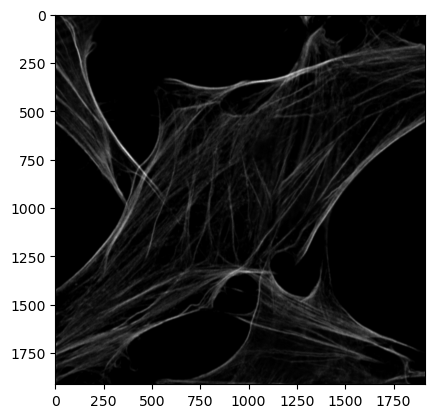

In [6]:
# import matplotlib for loading images
import matplotlib.pyplot as plt

# Let's display the second channel as a 2D image in a figure
plt.imshow(data[0,1,0,:,:], cmap='gray')

<div class="alert alert-success">
       
#### Exercise 

Display the second and third channels in the image and change the colormap cmap value to 'hot'.
    
Hint: use the same function that in the previous cell.
</div>

Now let's display all the channels of the image in a subplot using a `for` loop:

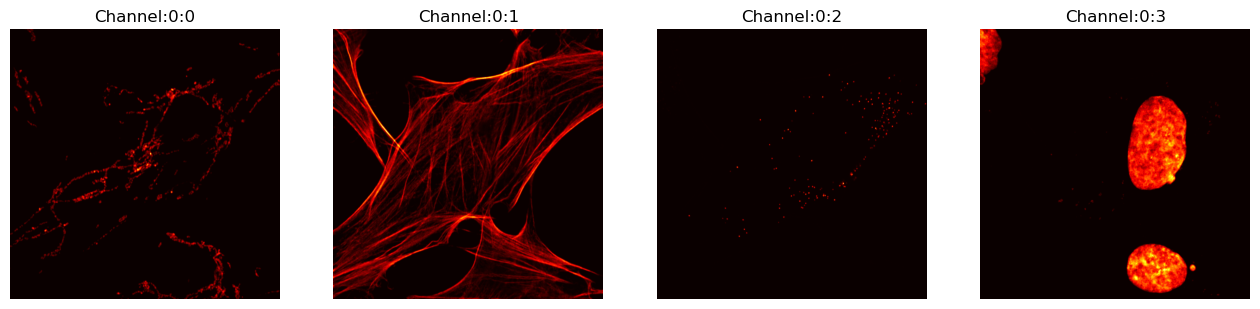

In [7]:
# import matplotlib for displaying images
import matplotlib.pyplot as plt

# compute the number of channels
num_channels = image.shape[1]

# Display the image for each channel
fig, ax = plt.subplots(1, num_channels, figsize=(16,4))
for k  in range(num_channels):    
    ax[k].imshow(image.data[0,k,0], cmap='hot')
    ax[k].set_axis_off()
    ax[k].set_title(image.channel_names[k])    

In the following cell, we crop a part of the image, display it in a figure and overlay the pixel values.

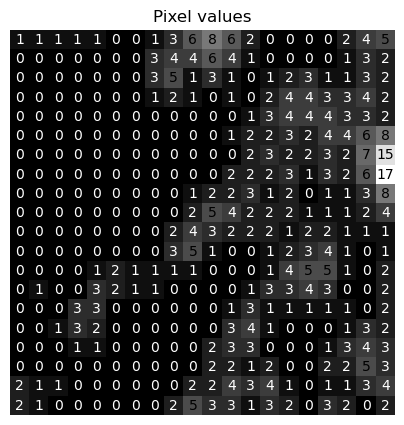

In [8]:
# Crop and downsample the array by a factor of 5
crop = image.data[0, 0, 0, 850:950:5, 900:1000:5] 

# Create a figure with axes
fig, ax = plt.subplots(figsize=(5, 5))

# Display the downsampled array in the figure
plt.imshow(crop, cmap='gray')

# Add the values of the pixel intensity
for i in range(crop.shape[0]):
    for j in range(crop.shape[1]):
        c = 'white' if crop[i, j] < 5 else 'black'
        ax.text(j, i, str(int(crop[i, j])), color=c, ha='center', va='center', size=10)
ax.axis("off")
plt.title('Pixel values');

<div class="alert alert-success">
       
#### Exercise 
    
Modify the previous cell to

1. select a different region within the image and display an overlay of the image with the pixel values,
2. check again the size of the image to be sure of not going out of bounds,
3. choose an appropriate downsampling factor,
4. adjust the figsize for a proper and visible display if necessary.
    
</div>

## Napari plugin

Napari is a fast, interactive, and open-source Python tool for viewing, annotating, and analyzing large multi-dimensional scientific images. It allows users to visualize 2D, 3D, and higher-dimensional data on a single canvas, overlay derived data like points and segmentations, and seamlessly integrate exploration with computation and annotation.

In [9]:
import napari

viewer = napari.Viewer()
viewer.add_image(data, channel_axis=1)

[<Image layer 'Image' at 0x1d95dc51ee0>,
 <Image layer 'Image [1]' at 0x1d95dc51e50>,
 <Image layer 'Image [2]' at 0x1d95f0f3620>,
 <Image layer 'Image [3]' at 0x1d95f108c80>]

<div class="alert alert-success">
       
#### Exercise 
    
Create a napari viewer to display the airyscan-4colors.tif data. Display the name of the channels and set the contrast limits as the minimal and maximal values.

1. set the `name` variable to be the image.channel_names or an user-defined list of channels names,
2. create a list of min and max intensity value for the 4 channels,
3. set the `contrast_limits` of each channel to range between the min and max intensity by attributing the `contrast_limits` variable to the created list in step 2,

Hint: use np.min(data[:, n, :, :, :]) and np.max(data[:, n, :, :, :]) to find the min and max of the n-th channel respectively
    
</div>

In [10]:
import numpy as np

contrast_limits = [[np.min(data[:, n, :, :, :]), np.max(data[:, n, :, :, :])] for n in np.arange(data.shape[1])]
contrast_limits

[[np.uint8(0), np.uint8(19)],
 [np.uint8(0), np.uint8(49)],
 [np.uint8(0), np.uint8(68)],
 [np.uint8(0), np.uint8(25)]]

We can also display timelapse data, points and tracks with napari. To do this, we will use the pandas library to first read the trajectories stored in an excel data. 

In [11]:
from bioio import BioImage
from pathlib import Path
# import nd2

In [12]:
parent = r"\\cephfs-cifs2\cephfs\sankar\Image analysis time lapse movies"
# file = "170725_Sun Bicd2_1hr_no delay_SRNA_1007.nd2"
file = "170725_Sun Bicd2_1hr_no delay_SRNA_1008.nd2"
filedir = Path(parent, file)

destinationdir = r"C:\Users\Dina Ratsimandresy\Documents\MRC-Office\Research\Dynamic inverse problem - tracking\experiment\Sankar\170725_Sun Bicd2_1hr_no delay_SRNA_1008\crop_t0_200_c0_z0_y280_360_x410_490"
# data0 = BioImage(filedir)

In [18]:
import pandas as pd

image = BioImage(filedir)
data  = image.data[0:200, :, :, 280:360, 410:490]
tracks = pd.read_excel(Path(destinationdir, "result_lt.xlsx"))

In [19]:
import napari
viewer = napari.Viewer()
viewer.add_image(data[:,:,0], channel_axis=1, name=["ch0", "ch1"])

[<Image layer 'ch0' at 0x1d9605e9940>, <Image layer 'ch1' at 0x1d9566930e0>]

Add points and tracks to the display

In [20]:
points = tracks.loc[:, ["frame", "y", "x"]].to_numpy()
viewer.add_points(points, size=0.5, symbol="disc", face_color="white")

<Points layer 'points' at 0x1d9964a06e0>

In [21]:
tracks_to_napari = tracks.loc[:, ["particle", "frame", "y", "x"]].to_numpy()
viewer.add_tracks(tracks_to_napari, name="tracks", tail_length=5)

<Tracks layer 'tracks' at 0x1d9964a30e0>